# McCulloch–Pitts Neuron (1943)

---

## Overview
The **McCulloch–Pitts Neuron** is the first formal model of a biological neuron, introduced in 1943.  
It is a **binary threshold unit**: the neuron either fires (1) or does not fire (0), depending on the weighted sum of its inputs.

---

## Model Definition
Given binary inputs:

$$
x_i \in \{0, 1\}
$$

and fixed weights:

$$
w_i \in \mathbb{R}
$$

the neuron computes an **activation**:

$$
a = \sum_{i=1}^{n} w_i x_i
$$

and applies a threshold function:

$$
y =
\begin{cases}
1 & \text{if } a \geq \theta \\
0 & \text{if } a < \theta
\end{cases}
$$

where:
- \( \theta \) = threshold value  
- \( y \) = binary output (firing or not firing)  

---

## Properties
- **Discrete States**: Inputs and outputs are binary.  
- **Deterministic Rule**: The neuron is purely logical (no learning rule).  
- **Logic Computation**: With appropriate weights and thresholds, the neuron can simulate Boolean logic (AND, OR, NOT).  

---

## Relevance
- **First formal model of computation with neurons.**  
- Demonstrated that networks of simple units could compute logical functions.  
- Laid the foundation for perceptrons and modern artificial neural networks.  

---

## Connection to Markov Models
Like Markov models, the McCulloch–Pitts neuron operates in **discrete states** and follows a simple, local rule to determine transitions (input → output).  
This made it an early mathematical bridge between **biological computation** and **formal automata theory**.

---

## Summary
- Proposed in **1943** by Warren McCulloch and Walter Pitts.  
- A **binary threshold model** of a neuron.  
- Could represent **Boolean logic gates** (AND, OR, NOT).  
- Pioneered the idea that networks of neurons could perform **complex computation**.  
- Served as the **starting point for neural networks and deep learning**.


In [1]:
# ===========================================================
# McCulloch–Pitts Neuron (1943)
# -----------------------------------------------------------
# Domain: Neuroscience-inspired computing
# Description: Simplified model of a biological neuron,
#              using binary threshold logic.
# Relevance: First formal model of neural networks.
# Connection: Like Markov chains, it formalized computation
#             with discrete states.
# ===========================================================

import torch
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# -----------------------------
# McCulloch-Pitts Neuron Class
# -----------------------------
class MCPNeuron:
    def __init__(self, weights, threshold=1.0):
        """
        weights: tensor of input weights
        threshold: activation threshold
        """
        self.weights = torch.tensor(weights, dtype=torch.float32)
        self.threshold = threshold

    def forward(self, x):
        """
        x: binary input vector (0/1)
        returns: binary output (0/1)
        """
        x = torch.tensor(x, dtype=torch.float32)
        activation = torch.dot(self.weights, x)
        return 1 if activation >= self.threshold else 0

    def truth_table(self):
        """
        Generate truth table for all binary input combinations.
        """
        n_inputs = len(self.weights)
        inputs = list(itertools.product([0,1], repeat=n_inputs))
        table = []
        for inp in inputs:
            out = self.forward(inp)
            table.append((inp, out))
        return table

In [2]:
# -----------------------------
# Example 1: AND gate
# -----------------------------
and_neuron = MCPNeuron(weights=[1,1], threshold=2)

print("AND Gate Truth Table")
for inp, out in and_neuron.truth_table():
    print(f"Input: {inp} -> Output: {out}")

AND Gate Truth Table
Input: (0, 0) -> Output: 0
Input: (0, 1) -> Output: 0
Input: (1, 0) -> Output: 0
Input: (1, 1) -> Output: 1


In [3]:
# -----------------------------
# Example 2: OR gate
# -----------------------------
or_neuron = MCPNeuron(weights=[1,1], threshold=1)

print("\nOR Gate Truth Table")
for inp, out in or_neuron.truth_table():
    print(f"Input: {inp} -> Output: {out}")


OR Gate Truth Table
Input: (0, 0) -> Output: 0
Input: (0, 1) -> Output: 1
Input: (1, 0) -> Output: 1
Input: (1, 1) -> Output: 1


In [4]:
# -----------------------------
# Example 3: NAND gate
# -----------------------------
nand_neuron = MCPNeuron(weights=[-1,-1], threshold=-1)

print("\nNAND Gate Truth Table")
for inp, out in nand_neuron.truth_table():
    print(f"Input: {inp} -> Output: {out}")


NAND Gate Truth Table
Input: (0, 0) -> Output: 1
Input: (0, 1) -> Output: 1
Input: (1, 0) -> Output: 1
Input: (1, 1) -> Output: 0


/tmp/ipython-input-570714812.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


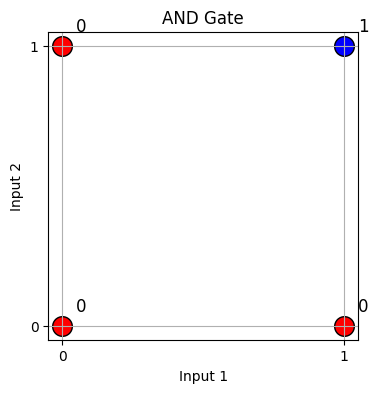

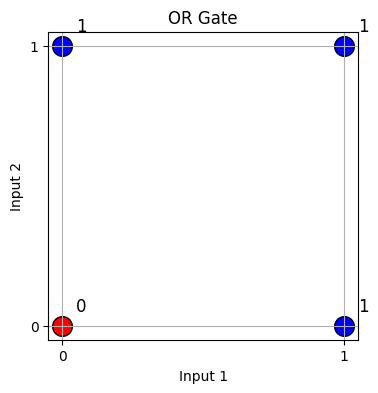

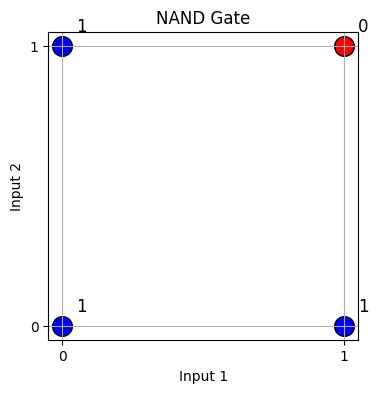

In [5]:
# -----------------------------
# Visualization: Decision Boundaries
# -----------------------------
def plot_decision_boundary(neuron, title):
    x = torch.tensor([[i,j] for i in [0,1] for j in [0,1]])
    y = [neuron.forward(pt) for pt in x]

    plt.figure(figsize=(4,4))
    for i, pt in enumerate(x):
        color = "red" if y[i]==0 else "blue"
        plt.scatter(pt[0], pt[1], color=color, s=200, edgecolor="k")
        plt.text(pt[0]+0.05, pt[1]+0.05, f"{y[i]}", fontsize=12)
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.grid(True)
    plt.xticks([0,1])
    plt.yticks([0,1])
    plt.show()

plot_decision_boundary(and_neuron, "AND Gate")
plot_decision_boundary(or_neuron, "OR Gate")
plot_decision_boundary(nand_neuron, "NAND Gate")

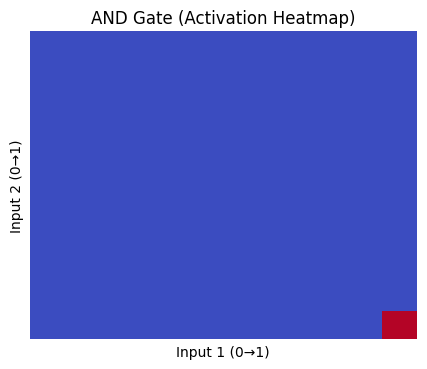

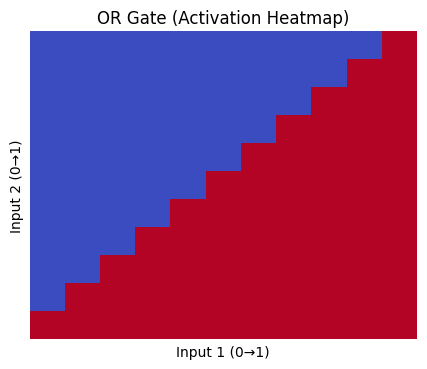

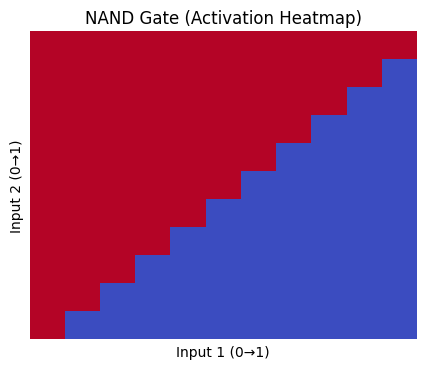

In [6]:
# -----------------------------
# Visualization: Heatmap of Activation
# -----------------------------
def activation_heatmap(neuron, title):
    grid = torch.zeros((11,11))
    for i, x1 in enumerate(torch.linspace(0,1,11)):
        for j, x2 in enumerate(torch.linspace(0,1,11)):
            grid[j,i] = neuron.forward([x1, x2])

    plt.figure(figsize=(5,4))
    sns.heatmap(grid.numpy(), cmap="coolwarm", cbar=False, xticklabels=False, yticklabels=False)
    plt.title(title + " (Activation Heatmap)")
    plt.xlabel("Input 1 (0→1)")
    plt.ylabel("Input 2 (0→1)")
    plt.show()

activation_heatmap(and_neuron, "AND Gate")
activation_heatmap(or_neuron, "OR Gate")
activation_heatmap(nand_neuron, "NAND Gate")
